#### Introduction

This is the and the decomposition part of the wind speed of the two datasets. There is no known Python implementation of successive variational mode decompostion (SVMD), so we used the Matlab implementation of SVMD, which can be found [here](https://www.mathworks.com/matlabcentral/fileexchange/98649-successive-variational-mode-decomposition-svmd-m)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc


In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
# sns.set(style='whitegrid', palette='muted', font_scale=1.2)
#HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 8


### April Dataset Decomposition

##### SVMD-based Decomposition

In [4]:
df_decomp = pd.read_csv('inputs/SVMD_1.csv')

In [5]:
df_decomp

,IMF-1,IMF-2,IMF-3,IMF-4
0,7.850187,-0.843075,-0.029416,0.683727
1,7.850133,-0.838198,-0.025512,0.638413
2,7.850024,-0.828471,-0.017903,0.550865
3,7.849860,-0.813951,-0.006975,0.427030
4,7.849637,-0.794723,0.006710,0.275308
...,...,...,...,...
1435,8.992862,-0.264966,0.921262,-0.225028
1436,8.991859,-0.270280,1.033266,-0.342685
1437,8.991105,-0.274290,1.119610,-0.438165
1438,8.990603,-0.276974,1.178303,-0.505399


In [6]:
imfs1 = np.array([df_decomp[col].values for col in df_decomp.columns])

In [7]:
df1 = pd.read_csv('inputs/DS1_1440.csv')

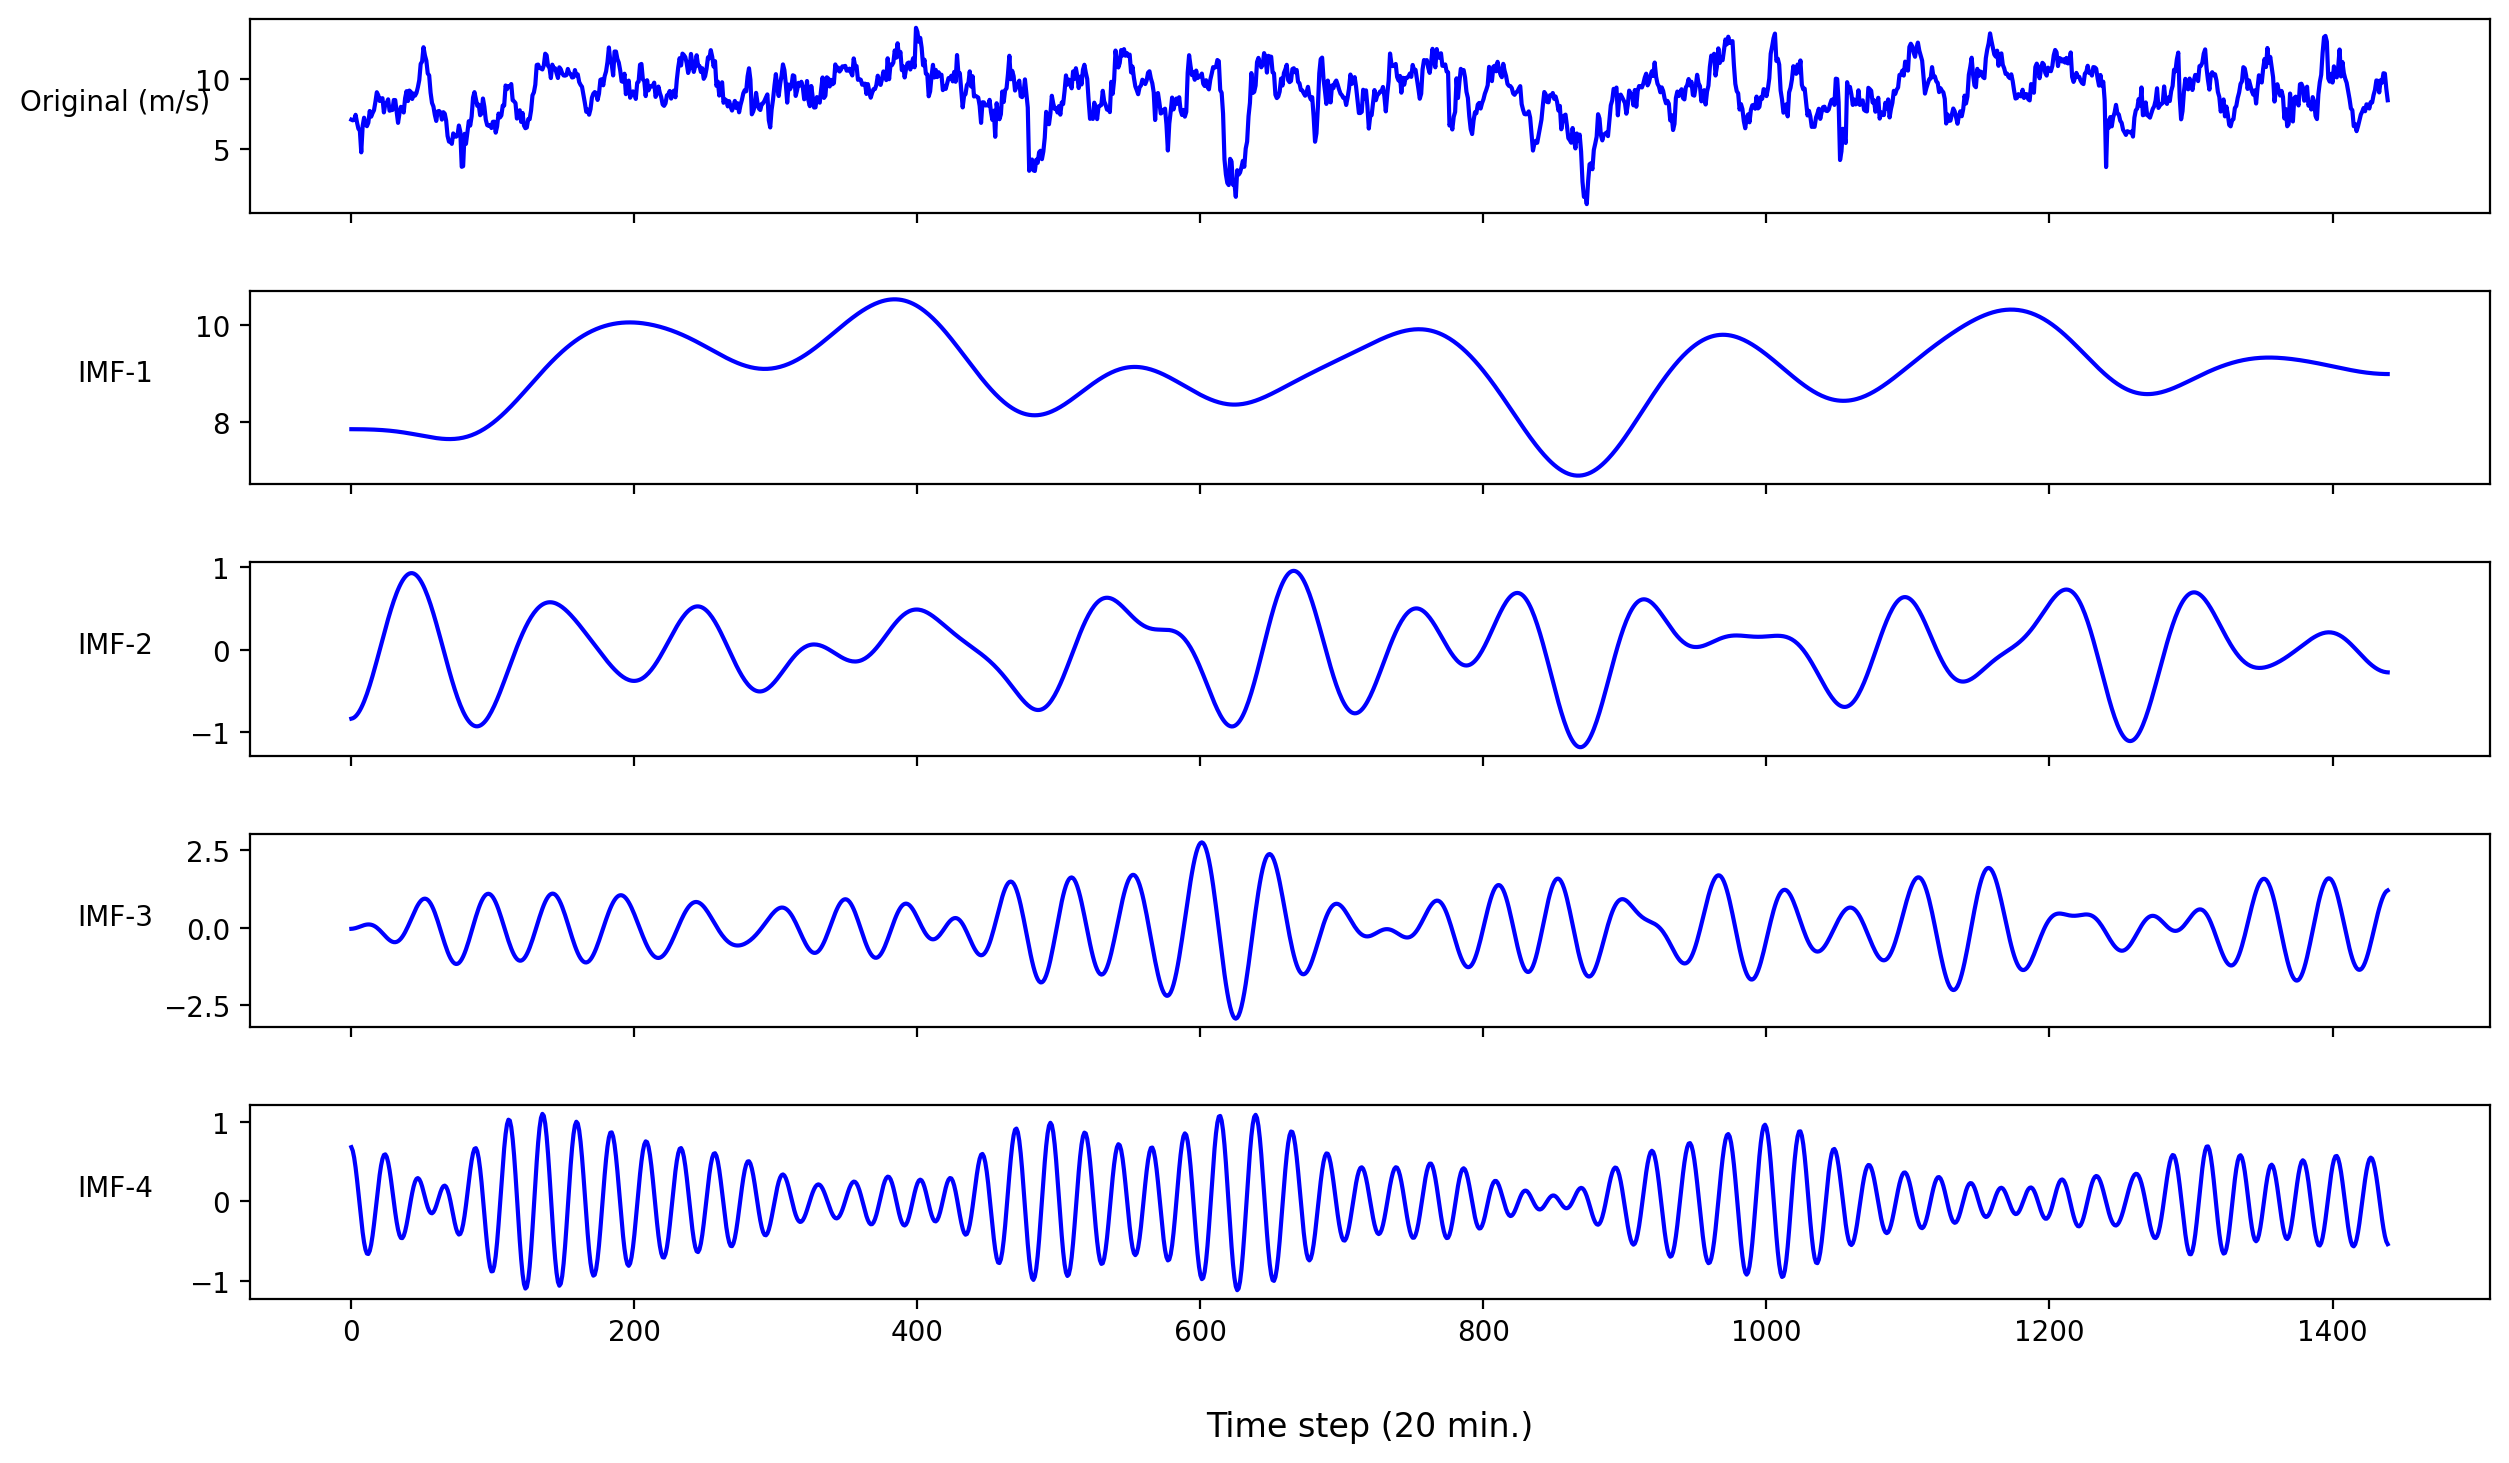

In [9]:
# plt.figure(figsize=(14, 10))
tot_d = imfs1.shape[0] + 1
fig, axs = plt.subplots(tot_d, sharex=True)

# fig.subplots_adjust(hspace=.2)
# fig.subplots_adjust(left=0.2, wspace=0.8)



for i in range(tot_d):
    if i == 0:
        axs[i].plot(df1.wind_speed.values, color='b')
        axs[i].set_ylabel('Original (m/s)', rotation = 0, fontsize = 10, labelpad = 10)
#     elif i < 4:
#         axs[i].plot(u[i-1])
#         axs[i].set(ylabel='IMF-' + str(i) + ' (m/s)')
    else:
        axs[i].plot(imfs1[i-1, :], color='b')
        axs[i].set_ylabel('IMF-'+str(i), rotation = 0, fontsize = 10, labelpad = 10)

    axs[i].get_yaxis().set_label_coords(-.06,.5)

# fig.tight_layout(pad=1)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# fig.set_figheight(15)

fig.supxlabel('Time step (20 min.)')
fig.savefig('vmds_1.png', dpi=300)


In [10]:
df_sv2 = pd.read_csv('inputs/SVMD_2.csv')

In [11]:
imfs2 = np.array([df_sv2[col].values for col in df_sv2.columns])

In [12]:
df2 = pd.read_csv('inputs/DS2_1448.csv')

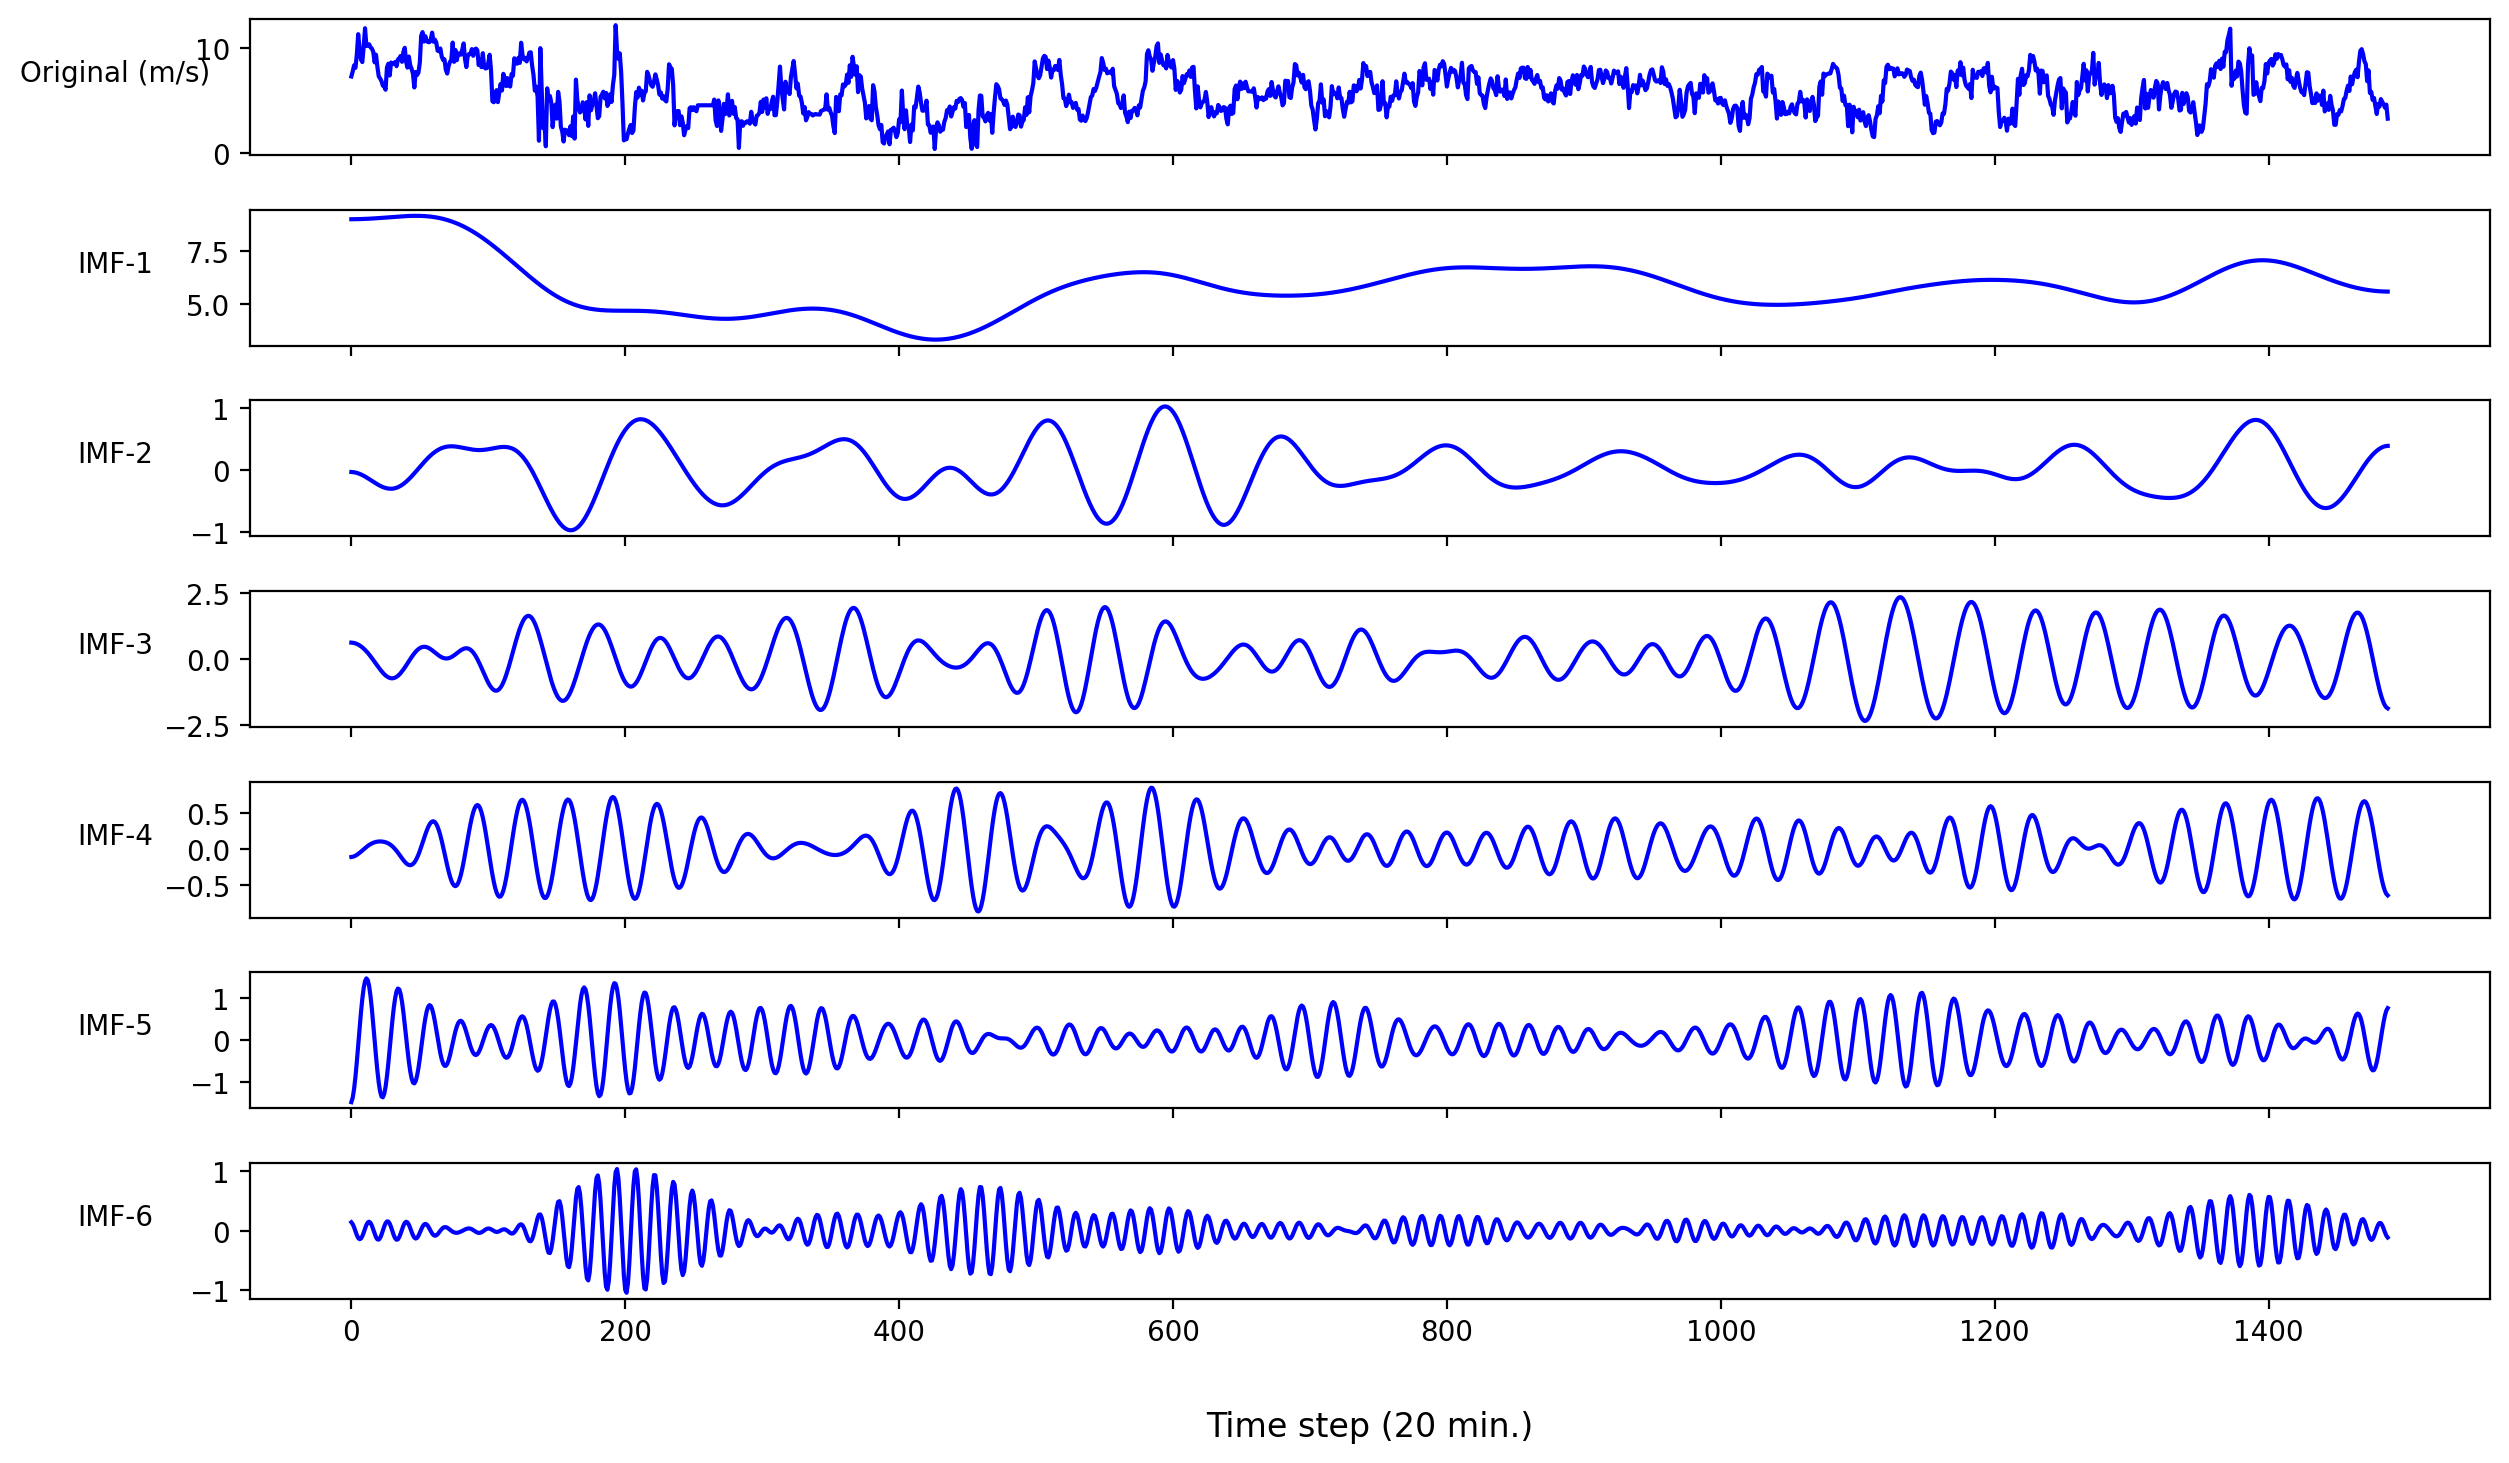

In [13]:
# plt.figure(figsize=(14, 10))
tot_d = imfs2.shape[0] + 1
fig, axs = plt.subplots(tot_d, sharex=True)

# fig.subplots_adjust(hspace=.2)
# fig.subplots_adjust(left=0.2, wspace=0.8)



for i in range(tot_d):
    if i == 0:
        axs[i].plot(df2.wind_speed.values, color='b')
        axs[i].set_ylabel('Original (m/s)', rotation = 0, fontsize = 10, labelpad = 10)
#     elif i < 4:
#         axs[i].plot(u[i-1])
#         axs[i].set(ylabel='IMF-' + str(i) + ' (m/s)')
    else:
        axs[i].plot(imfs2[i-1, :], color='b')
        axs[i].set_ylabel('IMF-'+str(i), rotation = 0, fontsize = 10, labelpad = 10)

    axs[i].get_yaxis().set_label_coords(-.06,.5)

# fig.tight_layout(pad=1)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# fig.set_figheight(15)

fig.supxlabel('Time step (20 min.)')
fig.savefig('vmds_2.png', dpi=300)


In [13]:
df_sv2.shape

(1488, 6)

In [15]:
df_sv2.columns = ['IMF-'+str(i+1) for i in range(6)]

In [16]:
df_sv2

,IMF-1,IMF-2,IMF-3,IMF-4,IMF-5,IMF-6
0,8.975682,-0.038366,0.624298,-0.111836,-1.479115,0.140007
1,8.975958,-0.039837,0.619370,-0.108724,-1.371954,0.109530
2,8.976509,-0.042764,0.609499,-0.102614,-1.165522,0.055161
3,8.977335,-0.047117,0.594654,-0.093728,-0.875014,-0.011347
4,8.978432,-0.052852,0.574799,-0.082388,-0.521791,-0.075600
...,...,...,...,...,...,...
1483,5.601922,0.361429,-1.515532,-0.451945,0.235773,0.090175
1484,5.599218,0.370347,-1.653226,-0.527500,0.425384,0.033315
1485,5.597188,0.377066,-1.759060,-0.586277,0.582773,-0.030621
1486,5.595834,0.381560,-1.830853,-0.626484,0.695309,-0.085161


In [18]:
df_sv1.columns = ['IMF-'+str(i+1) for i in range(4)]

In [19]:
df_sv1

,IMF-1,IMF-2,IMF-3,IMF-4
0,7.850187,-0.843075,-0.029416,0.683727
1,7.850133,-0.838198,-0.025512,0.638413
2,7.850024,-0.828471,-0.017903,0.550865
3,7.849860,-0.813951,-0.006975,0.427030
4,7.849637,-0.794723,0.006710,0.275308
...,...,...,...,...
1435,8.992862,-0.264966,0.921262,-0.225028
1436,8.991859,-0.270280,1.033266,-0.342685
1437,8.991105,-0.274290,1.119610,-0.438165
1438,8.990603,-0.276974,1.178303,-0.505399


In [20]:
df_sv1.to_csv('inputs/SVMD_1.csv', index=False)

In [21]:
df_sv2.to_csv('inputs/SVMD_2.csv', index=False)

In [43]:
svmd_imfs.shape

(5, 4370)

In [44]:
df.shape

(4370, 2)

## EMD-based Decomposition

In [10]:
from PyEMD import EMD, Visualisation

In [11]:
emd = EMD()
emd_imfs = emd(df.wind_speed.values)

In [12]:
df.shape

(4370, 2)

In [13]:
emd_imfs.shape

(10, 4370)

In [14]:
df_emd = pd.DataFrame()

In [15]:
for i in range(emd_imfs.shape[0]):
    df_emd['IMF-'+str(i+1)] = emd_imfs[i, :]

In [16]:
df_emd

,IMF-1,IMF-2,IMF-3,IMF-4,IMF-5,IMF-6,IMF-7,IMF-8,IMF-9,IMF-10
0,-0.110005,-0.378868,0.372817,0.052553,-0.473921,0.084836,1.328518,-1.009888,-0.008381,8.573239
1,-0.155493,-0.402345,0.584782,0.056131,-0.476182,0.086812,1.329972,-1.010452,-0.008657,8.573531
2,0.170126,-0.114839,0.642170,0.052904,-0.476290,0.088550,1.331389,-1.011003,-0.008930,8.573824
3,-0.072884,0.278993,0.535033,0.042601,-0.474335,0.090048,1.332767,-1.011540,-0.009202,8.574118
4,-0.255787,0.369112,0.277245,0.026473,-0.470436,0.091308,1.334107,-1.012063,-0.009471,8.574413
...,...,...,...,...,...,...,...,...,...,...
4365,0.396137,-0.128165,-0.196832,-2.626769,1.447993,0.040764,0.544375,-0.445483,0.850931,5.095450
4366,0.322575,0.099810,0.326826,-2.609590,1.458094,0.044885,0.543111,-0.445579,0.850921,5.095897
4367,-0.427381,0.309171,0.775744,-2.576932,1.463265,0.048833,0.541811,-0.445664,0.850905,5.096347
4368,0.097837,0.331311,0.996750,-2.538426,1.463657,0.052600,0.540478,-0.445740,0.850883,5.096800


In [17]:
df_emd.to_csv('inputs/EMD_decomposed.csv', index=False)

In [18]:
emd_imfs.shape

(10, 4370)

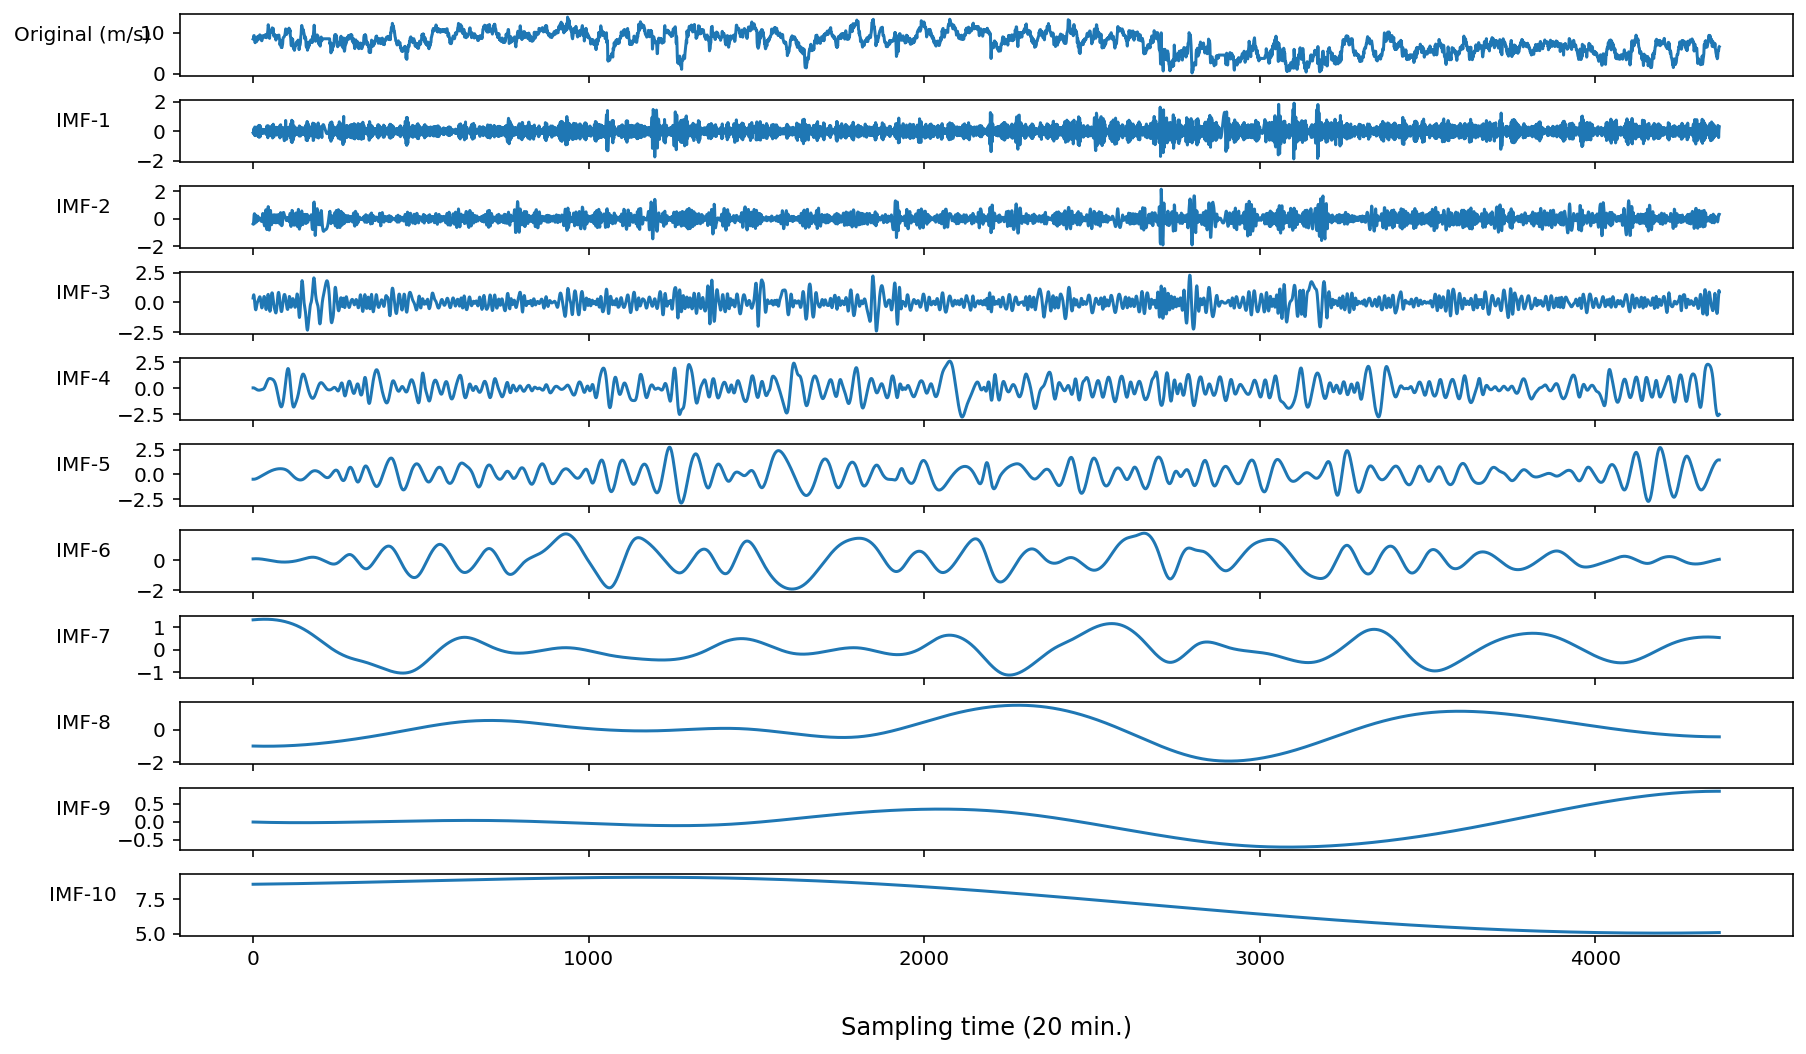

In [22]:
# plt.figure(figsize=(14, 10))
tot_d = emd_imfs.shape[0] + 1
fig, axs = plt.subplots(tot_d, sharex=True)

# fig.subplots_adjust(hspace=.2)
# fig.subplots_adjust(left=0.2, wspace=0.8)



for i in range(tot_d):
    if i == 0:
        axs[i].plot(df.wind_speed.values)
        axs[i].set_ylabel('Original (m/s)', rotation = 0, fontsize = 10, labelpad = 10)
#     elif i < 4:
#         axs[i].plot(u[i-1])
#         axs[i].set(ylabel='IMF-' + str(i) + ' (m/s)')
    else:
        axs[i].plot(emd_imfs[i-1, :])
        axs[i].set_ylabel('IMF-'+str(i), rotation = 0, fontsize = 10, labelpad = 10)

    axs[i].get_yaxis().set_label_coords(-.06,.5)

# fig.tight_layout(pad=1)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# fig.set_figheight(15)

fig.supxlabel('Sampling time (20 min.)')
fig.savefig('emds_.png', dpi=350)


### LMD-Based Decomposition

In [23]:
from PyLMD import LMD

In [24]:
lmd = LMD()

In [25]:
PFs, res = lmd.lmd(df.wind_speed.values.squeeze())

In [26]:
PFs.shape

(8, 4370)

In [27]:
res.shape

(4370,)

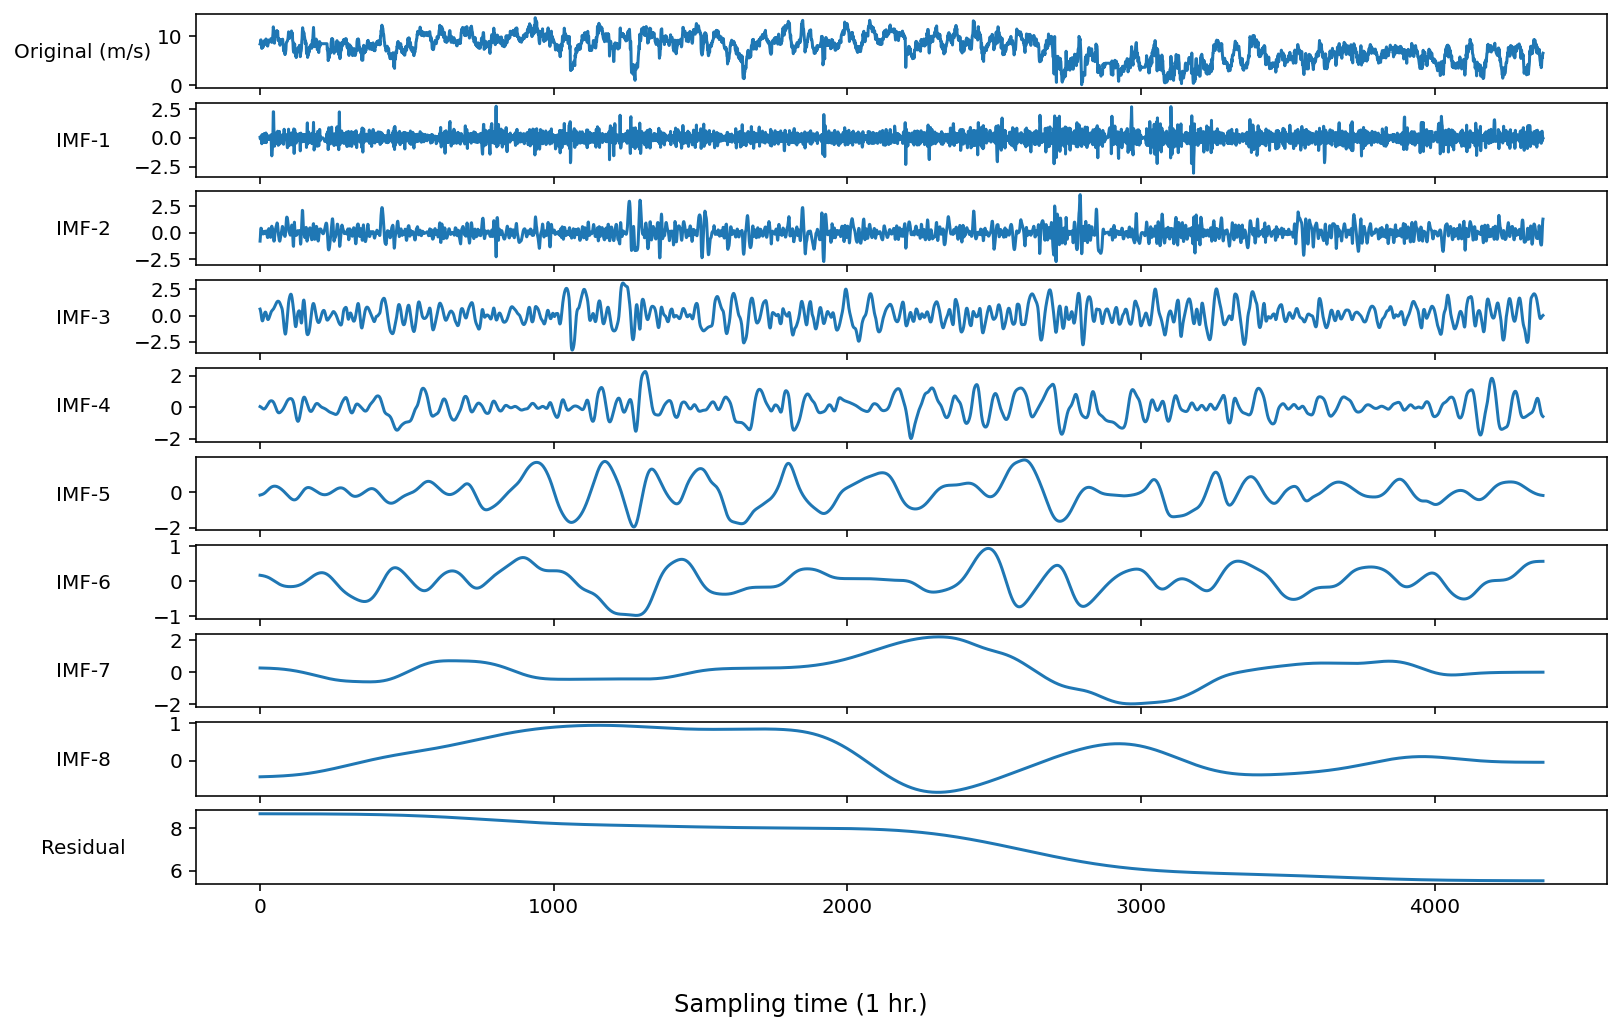

In [30]:
# plt.figure(figsize=(14, 8))
tot_d = PFs.shape[0] + 2
fig, axs = plt.subplots(tot_d, sharex=True)

fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(left=0.2, wspace=0.6)



for i in range(tot_d):
    if i == 0:
        axs[i].plot(df.wind_speed.values)
        axs[i].set_ylabel('Original (m/s)', rotation = 0, fontsize = 10, labelpad = 10)
#     elif i < 4:
#         axs[i].plot(u[i-1])
#         axs[i].set(ylabel='IMF-' + str(i) + ' (m/s)')
    else:
        if i == 9:
            axs[i].plot(res)
            axs[i].set_ylabel('Residual', rotation = 0, fontsize = 10, labelpad = 10)
        else:
            axs[i].plot(PFs[i-1, :])
            axs[i].set_ylabel('IMF-'+str(i), rotation = 0, fontsize = 10, labelpad = 10)

    axs[i].get_yaxis().set_label_coords(-.08,.35)


fig.supxlabel('Sampling time (1 hr.)')
fig.savefig('lmds_.png', dpi=350)


In [31]:
df_lmd = pd.DataFrame()

In [32]:
for i in range(8):
    df_lmd['IMF-'+str(i+1)] = PFs[i, :]

df_lmd['IMF-9'] = res

In [33]:
df_lmd

,IMF-1,IMF-2,IMF-3,IMF-4,IMF-5,IMF-6,IMF-7,IMF-8,IMF-9
0,0.041431,-0.795545,0.616996,0.032378,-0.167532,0.174817,0.269644,-0.435840,8.694550
1,-0.095821,-0.423844,0.536319,0.023626,-0.164190,0.173846,0.269292,-0.435663,8.694535
2,0.114889,0.166366,0.413110,0.013178,-0.160402,0.172790,0.268929,-0.435482,8.694520
3,0.064720,0.434158,0.242255,0.001230,-0.156176,0.171651,0.268555,-0.435298,8.694505
4,-0.057874,0.420899,0.027478,-0.012072,-0.151508,0.170429,0.268169,-0.435110,8.694490
...,...,...,...,...,...,...,...,...,...
4365,0.571090,-0.855803,-0.114715,-0.503840,-0.182492,0.572415,0.006534,-0.047280,5.532490
4366,0.576582,-0.159733,-0.071938,-0.537284,-0.184933,0.572511,0.006565,-0.047288,5.532468
4367,-0.273266,0.633108,-0.037244,-0.563643,-0.187196,0.572596,0.006596,-0.047296,5.532445
4368,0.060783,1.104559,-0.010303,-0.584031,-0.189275,0.572672,0.006626,-0.047304,5.532423


In [35]:
df_lmd.to_csv('inputs/LMD_decomposed.csv', index=False)